# Econ 220 Final Project
## Introduction
### Motivation
### Importance

## Literature Review

## Data

## Group Members
- Jason
- Briana Yang
- Franklin Zhang
- Alexander Liu

## Referenced Links
- [Stacked Barplot (Python Graph Gallery)](https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/)
- https://stackoverflow.com/questions/44353516/get-keys-of-pandas-series-value-counts

In [1]:
%pip install seaborn --upgrade
%pip show seaborn

Note: you may need to restart the kernel to use updated packages.
Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\alexa\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
import os

In [3]:
data_path = "Data"

df = pd.read_csv(os.path.join(data_path,"usa_00002.csv.gz"))

In [4]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'SEX', 'AGE', 'RACE', 'RACED', 'EDUC', 'EDUCD',
       'VETSTAT', 'VETSTATD'],
      dtype='object')

In [5]:
df.index


RangeIndex(start=0, stop=3239553, step=1)

In [6]:
data = df[['AGE','EDUC','VETSTAT','VETSTATD','RACE','SEX']]

In [7]:
data

,AGE,EDUC,VETSTAT,VETSTATD,RACE,SEX
0,39,4,1,11,2,1
1,21,4,1,11,1,2
2,19,7,1,11,2,1
3,77,3,1,11,1,1
4,41,3,1,11,2,1
...,...,...,...,...,...,...
3239548,63,6,1,11,1,2
3239549,45,5,1,11,1,1
3239550,85,6,1,11,1,2
3239551,67,11,1,11,1,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239553 entries, 0 to 3239552
Data columns (total 6 columns):
 #   Column    Dtype
---  ------    -----
 0   AGE       int64
 1   EDUC      int64
 2   VETSTAT   int64
 3   VETSTATD  int64
 4   RACE      int64
 5   SEX       int64
dtypes: int64(6)
memory usage: 148.3 MB


## Data Cleaning and Preprocessing

In [9]:
data['AGE'].max() # Check if we have 999 missing code

96

In [10]:
data['EDUC'].value_counts()

EDUC
6     957679
10    507242
7     378171
11    320738
1     235229
8     217713
2     208489
0     189602
5      82793
4      74787
3      67110
Name: count, dtype: int64

In [11]:
data['VETSTAT'].value_counts()

VETSTAT
1    2433934
0     601405
2     204214
Name: count, dtype: int64

In [12]:
data['SEX'].value_counts()

SEX
2    1651221
1    1588332
Name: count, dtype: int64

In [13]:
data['RACE'].value_counts()

RACE
1    2501187
2     303874
6     129502
7     115099
8      90322
4      46070
3      33216
9      12193
5       8090
Name: count, dtype: int64

Text(0.5, 1.0, 'Age by VETSTAT Code before Pre-Processing')

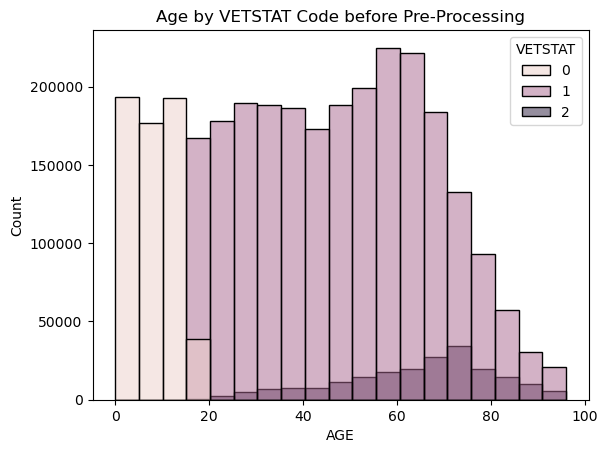

In [14]:
sns.histplot(data=data, x='AGE',hue='VETSTAT',binwidth=5).set_title("Age by VETSTAT Code before Pre-Processing")

In [21]:
summary_table = pd.DataFrame()

for column in data.columns:
    summary_table[column] = data[column].agg(['count','mean','std','min','max'])

print(summary_table.T)

              count       mean        std  min   max
AGE       3239553.0  42.224377  23.803392  0.0  96.0
EDUC      3239553.0   6.266964   3.248235  0.0  11.0
VETSTAT   3239553.0   0.877393   0.483373  0.0   2.0
VETSTATD  3239553.0   9.550664   5.051323  0.0  20.0
RACE      3239553.0   1.805289   1.881424  1.0   9.0
SEX       3239553.0   1.509706   0.499906  1.0   2.0


Text(0.5, 1.0, 'RACE value counts')

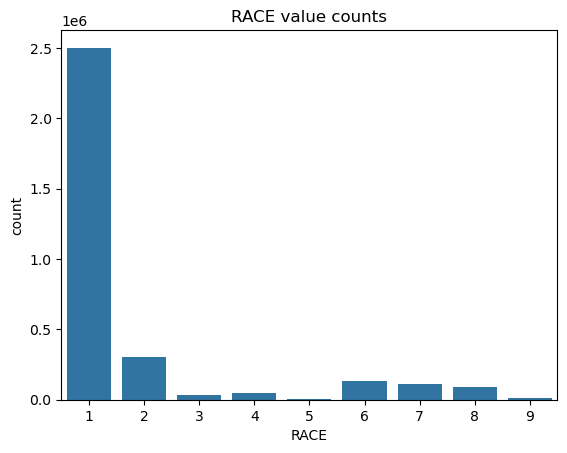

In [25]:
data['RACE'].value_counts()
sns.countplot(data=data, x='RACE').set_title("RACE value counts")

### Vetstat codes
- 0: N/A
- 1: Not a veteran
- 2: Is a veteran
- 9: Unknown

In [ ]:
# Remove VETSTAT codes 0 (N/A) and 9 (unknown)
data = data[~data['VETSTAT'].isin(set([0,9]))] # Remove people not qualified to serve as a veteran by AGE or other reasons

### Update VETSTAT codes
- 0: Not a veteran
- 1: Is a veteran

In [ ]:
vetstat_conversion = {1:0, 2:1}
if 2 in data['VETSTAT'].values: # prevent double run
    data['VETSTAT'] = data['VETSTAT'].apply(lambda x: vetstat_conversion[x])
data['VETSTAT'].value_counts()

C:\Users\Alexa\AppData\Local\Temp\ipykernel_11168\1271933246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VETSTAT'] = data['VETSTAT'].apply(lambda x: vetstat_conversion[x])


VETSTAT
0    2433934
1     204214
Name: count, dtype: int64

Text(0.5, 1.0, 'Veteran Status Code Counts')

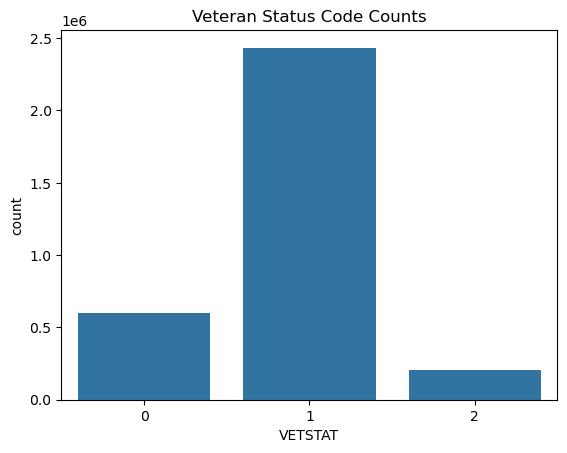

In [27]:
sns.countplot(data=data, x='VETSTAT').set_title("Veteran Status Code Counts")

### EDUC codes
- 00: N/A or no schooling
- 01: Nursery school to grade 4
- 02: Grade 5, 6, 7, or 8
- 03: Grade 9
- 04: Grade 10
- 05: Grade 11
- 06: Grade 12
- 07: 1 year of college
- 08: 2 years of college
- 09: 3 years of college
- 10: 4 years of college
- 11: 5+ years of college
- 99: Missing

<Axes: xlabel='EDUC', ylabel='count'>

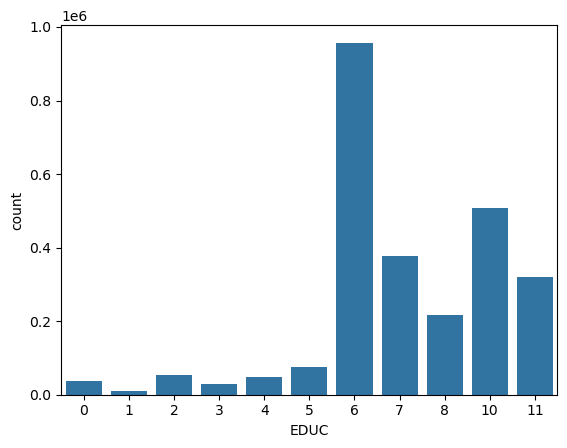

In [ ]:
data = data[data['EDUC'] != 99]
sns.countplot(data=data, x='EDUC')

## Descriptive Statistics

In [ ]:
# Display descriptive statistics for AGE
data['AGE'].agg(['mean','std','min','max','count'])

mean     4.993685e+01
std      1.923503e+01
min      1.700000e+01
max      9.600000e+01
count    2.638148e+06
Name: AGE, dtype: float64

In [ ]:
# I don't think there is utility in running these descriptive statistics on coded variables but am leaving it for now
data['VETSTAT'].agg(['mean','std','min','max','count'])

mean     7.740809e-02
std      2.672379e-01
min      0.000000e+00
max      1.000000e+00
count    2.638148e+06
Name: VETSTAT, dtype: float64

In [ ]:
data['EDUC'].agg(['mean','std','min','max','count'])

mean     7.395791e+00
std      2.408572e+00
min      0.000000e+00
max      1.100000e+01
count    2.638148e+06
Name: EDUC, dtype: float64

## Plots

Text(0.5, 1.0, 'Non-Veteran vs Veteran Status by Age')

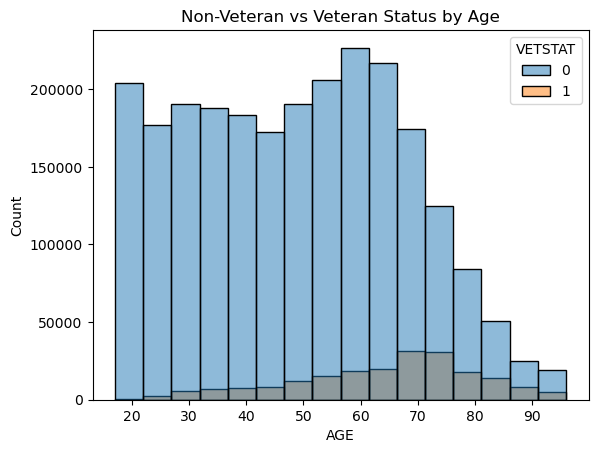

In [ ]:
sns.histplot(data=data, x='AGE',hue='VETSTAT',binwidth=5).set_title('Non-Veteran vs Veteran Status by Age')

Text(0.5, 1.0, 'Sex by Age')

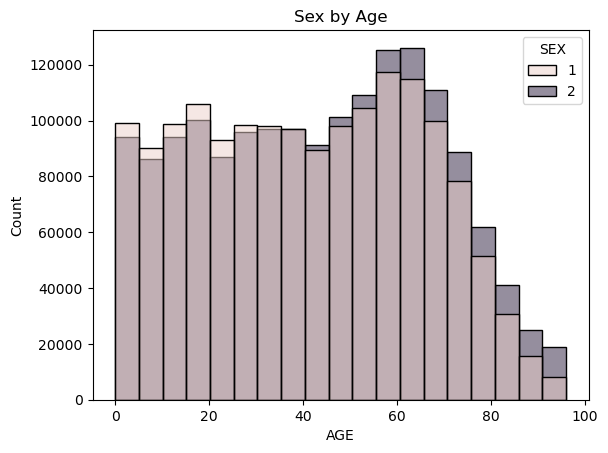

In [44]:
sns.histplot(data=data, x='AGE',hue='SEX',binwidth=5).set_title('Sex by Age')

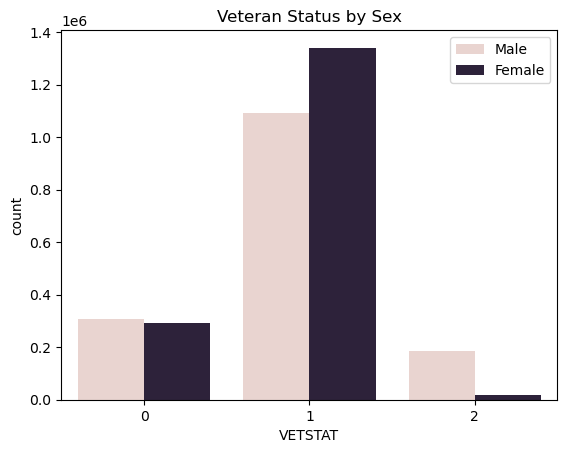

In [43]:
g = sns.countplot(data=data, x='VETSTAT',hue='SEX').set_title('Veteran Status by Sex')
plt.legend(labels=["Male","Female"])
plt.show(g)

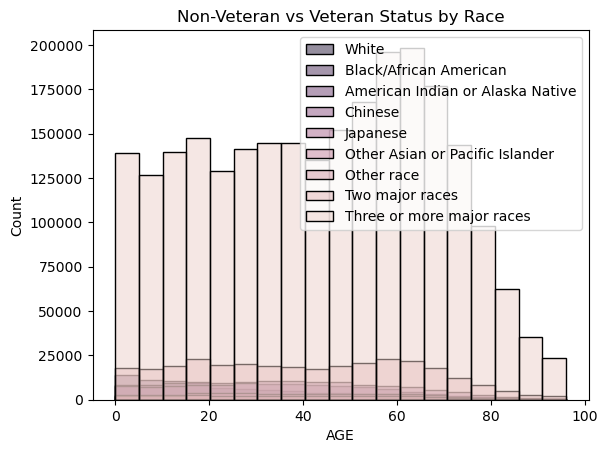

In [40]:
race_labels =['White','Black/African American','American Indian or Alaska Native','Chinese','Japanese', 'Other Asian or Pacific Islander','Other race','Two major races','Three or more major races']
g =sns.histplot(data=data, x='AGE',hue='RACE',binwidth=5).set_title('Non-Veteran vs Veteran Status by Race')
plt.legend(labels=race_labels)
plt.show(g)

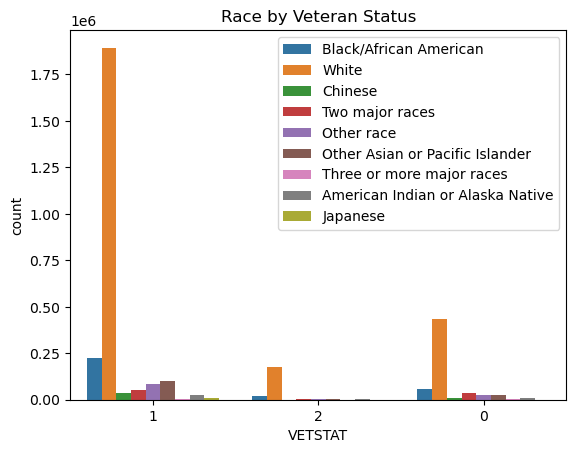

In [42]:
g = sns.countplot(data=data.astype(str), x='VETSTAT',hue="RACE").set_title('Race by Veteran Status')

handles, labels = plt.gca().get_legend_handles_labels()

# Map original labels to new labels
new_labels = [race_labels[int(label)-1] for label in labels]
plt.legend(handles,new_labels)
plt.show(g)

Text(0.5, 1.0, 'Veteran Status By Education Level Code')

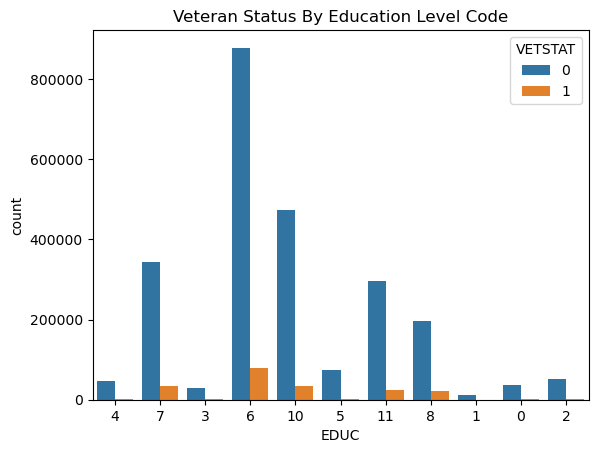

In [ ]:
sns.countplot(data=data.astype(str), x='EDUC',hue="VETSTAT").set_title('Veteran Status By Education Level Code')

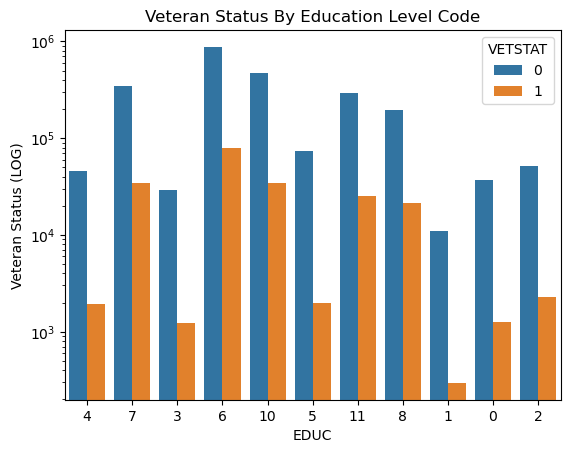

In [ ]:
sns.countplot(data=data.astype(str), x='EDUC',hue="VETSTAT").set_title('Veteran Status By Education Level Code')
# Since veterans are a clear minority, we add a log scale to create more clarity
plt.ylabel("Veteran Status (LOG)")
plt.yscale('log')

In [ ]:
data["VETSTAT"].value_counts()

VETSTAT
0    2433934
1     204214
Name: count, dtype: int64

In [ ]:
# https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/
total = data[['EDUC','VETSTAT']].groupby(['EDUC','VETSTAT']).value_counts()
total

EDUC  VETSTAT
0     0           36893
      1            1244
1     0           11065
      1             295
2     0           51765
      1            2270
3     0           29073
      1            1241
4     0           45798
      1            1950
5     0           73699
      1            1958
6     0          877647
      1           79469
7     0          343569
      1           34532
8     0          196253
      1           21447
10    0          472869
      1           34373
11    0          295303
      1           25435
Name: count, dtype: int64

In [ ]:
#total has a MultiIndex index we need to reset it
total = total.reset_index(level=[0,1]) # ["EDUC", "VETSTAT"] also works here
total

,EDUC,VETSTAT,count
0,0,0,36893
1,0,1,1244
2,1,0,11065
3,1,1,295
4,2,0,51765
5,2,1,2270
6,3,0,29073
7,3,1,1241
8,4,0,45798
9,4,1,1950


In [ ]:
print(total[total["EDUC"] == 9]["count"].sum())
total[total["EDUC"] == 9]

0


,EDUC,VETSTAT,count


In [ ]:
total["EDUC"].value_counts().index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11], dtype='int64', name='EDUC')

    EDUC  VETSTAT  count
1      0        1   1244
3      1        1    295
5      2        1   2270
7      3        1   1241
9      4        1   1950
11     5        1   1958
13     6        1  79469
15     7        1  34532
17     8        1  21447
19    10        1  34373
21    11        1  25435


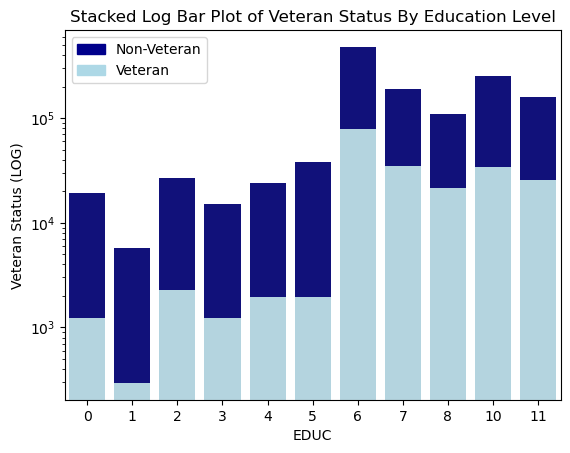

In [ ]:
bar1 = sns.barplot(x='EDUC',y='count',data=total,color='darkblue',errorbar=None)
# Bottom bar
vet = total[total['VETSTAT']==1]

print(vet)
bar2 = sns.barplot(x='EDUC',y='count',data=vet,estimator=sum,errorbar=None,color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='Non-Veteran')
bottom_bar = mpatches.Patch(color='lightblue', label='Veteran')
plt.legend(handles=[top_bar,bottom_bar])

# show the graph
plt.title("Stacked Log Bar Plot of Veteran Status By Education Level")
plt.ylabel("Veteran Status (LOG)")
plt.yscale('log')
plt.show()

EDUC
0      38137
1      11360
2      54035
3      30314
4      47748
5      75657
6     957116
7     378101
8     217700
10    507242
11    320738
Name: count, dtype: int64
total:     EDUC  VETSTAT   count        PCT
0      0        0   36893  96.738076
2      1        0   11065  97.403169
4      2        0   51765  95.799019
6      3        0   29073  95.906182
8      4        0   45798  95.916059
10     5        0   73699  97.412004
12     6        0  877647  91.697036
14     7        0  343569  90.866991
16     8        0  196253  90.148369
18    10        0  472869  93.223550
20    11        0  295303  92.069851

 vet:     EDUC  VETSTAT  count       PCT
1      0        1   1244  3.261924
3      1        1    295  2.596831
5      2        1   2270  4.200981
7      3        1   1241  4.093818
9      4        1   1950  4.083941
11     5        1   1958  2.587996
13     6        1  79469  8.302964
15     7        1  34532  9.133009
17     8        1  21447  9.851631
19    10        1 

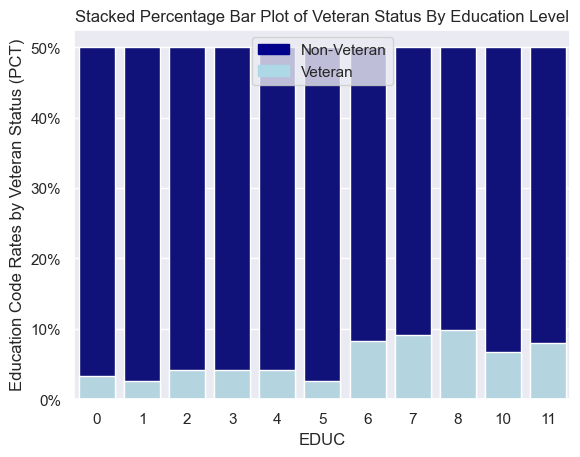

In [ ]:
sns.set_theme(style="darkgrid")

# Create Percentage column
educ_total = total.groupby("EDUC")["count"].sum()
print(educ_total)
total["PCT"] = total["count"] / total["EDUC"].map(educ_total) * 100


# Begin plotting
bar1 = sns.barplot(x='EDUC',y='PCT',data=total,color='darkblue',errorbar=None)
# Bottom bar
vet = total[total['VETSTAT']==1]
print(f"total: {total[total['VETSTAT']==0]}\n\n vet: {vet}")
bar2 = sns.barplot(x='EDUC',y='PCT',data=vet,estimator=sum,errorbar=None,color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='Non-Veteran')
bottom_bar = mpatches.Patch(color='lightblue', label='Veteran')
plt.legend(handles=[top_bar,bottom_bar])

# show the graph
plt.title("Stacked Percentage Bar Plot of Veteran Status By Education Level")
plt.ylabel("Education Code Rates by Veteran Status (PCT)")
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
#print(plt.gca())
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

In [ ]:
heatmap_df = total.pivot(index="VETSTAT",columns="EDUC",values="count")
heatmap_df

#.groupby(["VETSTAT"]).value_counts().unstack().T.reindex()

EDUC,0,1,2,3,4,5,6,7,8,10,11
VETSTAT,,,,,,,,,,,
0,36893,11065,51765,29073,45798,73699,877647,343569,196253,472869,295303
1,1244,295,2270,1241,1950,1958,79469,34532,21447,34373,25435


Text(0.5, 1.0, 'Education Heatmap by Veteran Status')

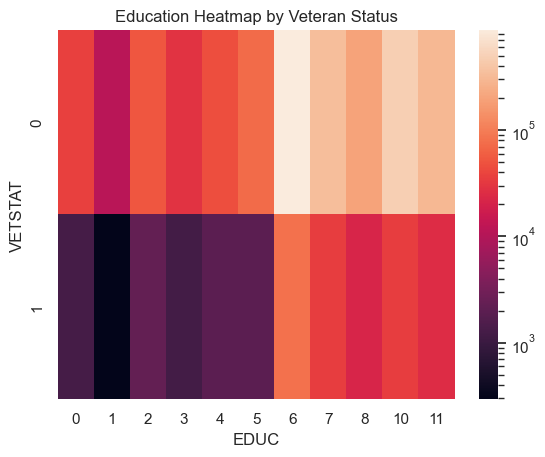

In [ ]:
sns.heatmap(data = heatmap_df,norm=LogNorm()).set_title("Education Heatmap by Veteran Status")
# Might need to make this logarithmic as well